---
title: KOSPI와 연관된 지수는?
jupyter: python3
---

In [1]:
from sklearn.cluster import KMeans
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## 세계 각국의 지수들 관련 데이터 불러오기

### KOSPI
* change(수익률)에 * 100을 해서 %수치로 보이기 편하게 수정하였고, Open(시가), High(고가), Close(종가), Volume(거래량)을 제거

In [2]:
kospi = fdr.DataReader("KS11")
kospi["Change"] = kospi["Change"] * 100
kospi = kospi.drop(
    ["Open", "High", "Low", "Close", "Volume", "UpDown", "Comp", "Amount", "MarCap"],
    axis=1,
)
kospi.rename(columns={"Change": "KOSPI"}, inplace=True)
kospi.head()

,KOSPI
Date,
2001-06-11,-2.18
2001-06-12,-0.18
2001-06-13,1.14
2001-06-14,-0.05
2001-06-15,0.85


### Nasdaq

In [3]:
nasdaq = fdr.DataReader("IXIC", "2001-06-08")
nasdaq["Change"] = round(nasdaq["Adj Close"].pct_change() * 100, 2)
nasdaq = nasdaq.drop(["High", "Low", "Open", "Close", "Volume", "Adj Close"], axis=1)
nasdaq = nasdaq.drop("2001-06-08", axis=0)
nasdaq.rename(columns={"Change": "NASDAQ"}, inplace=True)
nasdaq

,NASDAQ
Date,
2001-06-11,-2.00
2001-06-12,-0.04
2001-06-13,-2.23
2001-06-14,-3.66
2001-06-15,-0.77
...,...
2024-04-26,2.03
2024-04-29,0.35
2024-04-30,-2.04


### S&P 

In [4]:
sap = fdr.DataReader("S&P500", "2001-06-08", "2024-01-23")
sap["Change"] = round(sap["Adj Close"].pct_change() * 100, 2)
sap = sap.drop(["High", "Low", "Open", "Close", "Volume", "Adj Close"], axis=1)
sap = sap.drop("2001-06-08", axis=0)
sap.rename(columns={"Change": "S&P"}, inplace=True)
sap.head()

,S&P
Date,
2001-06-11,-0.84
2001-06-12,0.12
2001-06-13,-1.13
2001-06-14,-1.75
2001-06-15,-0.45


### 미국 10년 국채

In [5]:
usa_treasury = fdr.DataReader("US10YT", "2001-06-08", "2024-01-23")
usa_treasury["Change"] = round(usa_treasury["Adj Close"].pct_change() * 100, 2)
usa_treasury = usa_treasury.drop(
    ["High", "Low", "Open", "Close", "Volume", "Adj Close"], axis=1
)
usa_treasury = usa_treasury.drop("2001-06-08", axis=0)
usa_treasury = usa_treasury.rename(columns={"Change": "USA_TREASURY"})
usa_treasury

C:\Users\user\AppData\Local\Temp\ipykernel_10676\2256364050.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  usa_treasury["Change"] = round(usa_treasury["Adj Close"].pct_change() * 100, 2)


,USA_TREASURY
Date,
2001-06-11,-0.86
2001-06-12,-0.89
2001-06-13,0.32
2001-06-14,-0.80
2001-06-15,0.25
...,...
2024-01-16,2.94
2024-01-17,0.98
2024-01-18,0.93


### Nikkei

In [6]:
japan = fdr.DataReader("N225", "2001-06-08", "2024-01-23")
japan["Change"] = round(japan["Adj Close"].pct_change() * 100, 2)
japan = japan.drop(["High", "Low", "Open", "Close", "Volume", "Adj Close"], axis=1)
japan = japan.drop("2001-06-08", axis=0)
japan.rename(columns={"Change": "Nikkei"}, inplace=True)
japan

C:\Users\user\AppData\Local\Temp\ipykernel_10676\1959846037.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  japan["Change"] = round(japan["Adj Close"].pct_change() * 100, 2)


,Nikkei
Date,
2001-06-11,-1.52
2001-06-12,-2.92
2001-06-13,-0.13
2001-06-14,0.18
2001-06-15,-0.44
...,...
2024-01-16,-0.79
2024-01-17,-0.40
2024-01-18,-0.03


In [7]:
usd_krw = fdr.DataReader("USD/KRW", "2001-06-08")
usd_krw["Change"] = round(usd_krw["Adj Close"].pct_change() * 100, 2)
usd_krw = usd_krw.drop(["High", "Low", "Open", "Close", "Volume", "Adj Close"], axis=1)
usd_krw = usd_krw.rename(columns={"Change": "USD/KRW"})
usd_krw

C:\Users\user\AppData\Local\Temp\ipykernel_10676\1180829902.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  usd_krw["Change"] = round(usd_krw["Adj Close"].pct_change() * 100, 2)


,USD/KRW
Date,
2003-12-01,NaN
2003-12-02,-0.28
2003-12-03,-0.21
2003-12-04,-0.20
2003-12-05,-0.45
...,...
2024-04-29,0.39
2024-04-30,-0.18
2024-05-01,0.79


## 데이터 병합
각 지수들 및 환율 국채를 합쳐줍니다. 결측치는 평균으로 대체하였습니다.

In [8]:
result_data = pd.concat([kospi, nasdaq, sap, usd_krw, usa_treasury, japan], axis=1)
result_data.fillna(result_data.mean(), inplace=True)
result_data = round(result_data, 2)

In [9]:
result_data.to_csv("./data/kospi_result_data.csv")

## 군집분석

## K_Means 를 사용하여 군집을 분류하였습니다.
- kospi 를 target으로 설정하였습니다

In [10]:
X = result_data[["NASDAQ", "S&P", "USD/KRW", "USA_TREASURY", "Nikkei"]]
y = result_data["KOSPI"]

### $N$ = $\{3,4\}$일때 최적의 분류를 확인

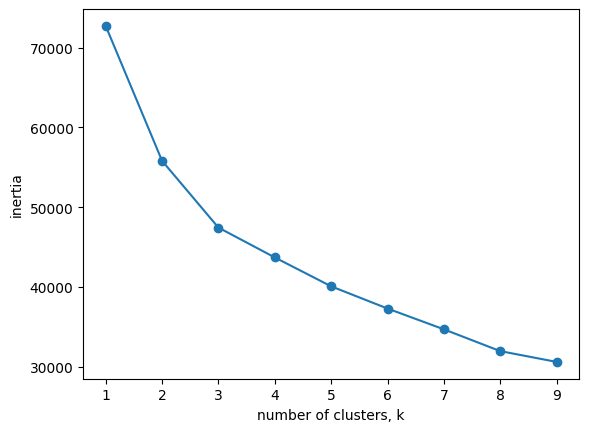

In [11]:
ks = range(1, 10)

inertias = []

for k in ks:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    inertias.append(model.inertia_)

plt.plot(ks, inertias, "-o")
plt.xlabel("number of clusters, k")
plt.ylabel("inertia")
plt.xticks(ks)
plt.show()

### $N$ = $3$로 군집분석 진행 

In [12]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
y_kmeans[1:10]

array([0, 0, 1, 0, 0, 0, 0, 0, 1])

### TSNE를 통한 차원축소 진행

In [13]:
import time
from sklearn.manifold import TSNE

n_sne = X.shape[0]

time_start = time.time()
tsne = TSNE(
    n_components=2, verbose=1, perplexity=32, n_iter=1000, random_state=0, angle=0.5
)
tsne_results = tsne.fit_transform(X)
print("t-SNE done! Time elapsed: {} seconds".format(time.time() - time_start))

[t-SNE] Computing 97 nearest neighbors...
[t-SNE] Indexed 5975 samples in 0.006s...
[t-SNE] Computed neighbors for 5975 samples in 0.202s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5975
[t-SNE] Computed conditional probabilities for sample 2000 / 5975
[t-SNE] Computed conditional probabilities for sample 3000 / 5975
[t-SNE] Computed conditional probabilities for sample 4000 / 5975
[t-SNE] Computed conditional probabilities for sample 5000 / 5975
[t-SNE] Computed conditional probabilities for sample 5975 / 5975
[t-SNE] Mean sigma: 0.384280
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.905296
[t-SNE] KL divergence after 1000 iterations: 1.556957
t-SNE done! Time elapsed: 13.276496410369873 seconds


### 군집분석 결과 시각화

In [15]:
df1 = result_data.copy()

In [16]:
df1["cluster"] = y_kmeans
df1

,KOSPI,NASDAQ,S&P,USD/KRW,USA_TREASURY,Nikkei,cluster
Date,,,,,,,
2001-06-11,-2.18,-2.00,-0.84,0.01,-0.86,-1.52,1
2001-06-12,-0.18,-0.04,0.12,0.01,-0.89,-2.92,0
2001-06-13,1.14,-2.23,-1.13,0.01,0.32,-0.13,0
2001-06-14,-0.05,-3.66,-1.75,0.01,-0.80,0.18,1
2001-06-15,0.85,-0.77,-0.45,0.01,0.25,-0.44,0
...,...,...,...,...,...,...,...
2024-04-29,1.17,0.35,0.03,0.39,0.03,0.03,0
2024-04-30,0.17,-2.04,0.03,-0.18,0.03,0.03,0
2024-05-01,0.03,-0.33,0.03,0.79,0.03,0.03,0


### 군집분석 결과에 따른 군집들을 새로운 데이터 프레임으로 생성 

In [17]:
## 군집 0 ~ 3 까지 분류된거를 변수명에 추가
cluster_2 = df1[df1["cluster"] == 2]
cluster_1 = df1[df1["cluster"] == 1]
cluster_0 = df1[df1["cluster"] == 0]

In [18]:
cluster_0

,KOSPI,NASDAQ,S&P,USD/KRW,USA_TREASURY,Nikkei,cluster
Date,,,,,,,
2001-06-12,-0.18,-0.04,0.12,0.01,-0.89,-2.92,0
2001-06-13,1.14,-2.23,-1.13,0.01,0.32,-0.13,0
2001-06-15,0.85,-0.77,-0.45,0.01,0.25,-0.44,0
2001-06-18,-1.64,-1.96,-0.49,0.01,0.25,-0.72,0
2001-06-19,0.02,0.20,0.34,0.01,-0.25,-0.97,0
...,...,...,...,...,...,...,...
2024-04-29,1.17,0.35,0.03,0.39,0.03,0.03,0
2024-04-30,0.17,-2.04,0.03,-0.18,0.03,0.03,0
2024-05-01,0.03,-0.33,0.03,0.79,0.03,0.03,0


In [19]:
cluster_1

,KOSPI,NASDAQ,S&P,USD/KRW,USA_TREASURY,Nikkei,cluster
Date,,,,,,,
2001-06-11,-2.18,-2.00,-0.84,0.01,-0.86,-1.52,1
2001-06-14,-0.05,-3.66,-1.75,0.01,-0.80,0.18,1
2001-06-22,0.60,-1.16,-0.95,0.01,-1.04,0.63,1
2001-07-05,-0.61,-2.83,-1.23,0.01,0.63,-0.17,1
2001-07-06,-2.54,-3.65,-2.35,0.01,-0.70,-2.39,1
...,...,...,...,...,...,...,...
2023-12-13,-0.97,1.38,1.37,-0.26,-4.11,0.25,1
2023-12-14,1.34,0.19,0.26,-1.38,-2.55,-0.73,1
2023-12-20,1.78,-1.50,-1.47,-0.40,-1.15,1.37,1


In [20]:
cluster_2

,KOSPI,NASDAQ,S&P,USD/KRW,USA_TREASURY,Nikkei,cluster
Date,,,,,,,
2001-06-28,-0.25,2.44,1.25,0.01,1.78,-1.16,2
2001-09-04,3.13,-1.92,-0.06,0.01,3.38,3.49,2
2001-10-11,2.70,4.62,1.52,0.01,1.63,3.83,2
2001-11-02,1.19,-0.03,0.29,0.01,3.06,0.35,2
2001-11-08,1.96,-0.53,0.25,0.01,2.43,1.43,2
...,...,...,...,...,...,...,...
2023-11-15,2.20,0.07,0.16,-1.12,2.12,2.52,2
2023-11-30,0.61,-0.23,0.38,0.06,1.90,0.50,2
2023-12-08,1.03,0.45,0.41,-0.07,2.81,-1.68,2


### 군집별 수익률 확인
- 군집 0 ~ 3 까지의 수익률을 한번 확인

In [21]:
cluster_total = df1.groupby("cluster").mean()
cluster_total["return"] = cluster_total.T.mean()
cluster_total["std"] = cluster_total.T.std()
cluster_total = cluster_total.T
cluster_total

cluster,0,1,2
KOSPI,0.110197,-0.397085,0.311070
NASDAQ,0.303830,-1.264408,0.763326
S&P,0.245668,-1.093768,0.683464
USD/KRW,-0.018656,0.096690,-0.012839
USA_TREASURY,-0.007668,-2.492496,3.540360
Nikkei,0.119158,-0.494123,0.365180
return,0.125421,-0.940865,0.941760
std,0.119046,0.827387,1.189730


- 군집1 : 위험자산 + USA_TREASURY로 이뤄진 군집  
- 군집2 : Dolllar로 이뤄진 군집  
- 군집3 : 위험자산으로 이뤄진 군집 

### 군집별 수익률 대비 risk 시각화

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51061 (\N{HANGUL SYLLABLE IG}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from current font.
  func(*args, **kwarg

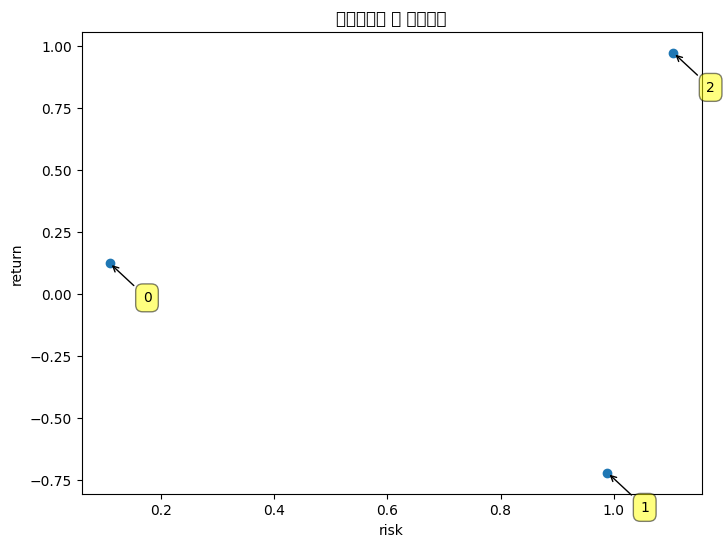

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(cluster_total.std(), cluster_total.mean())
plt.xlabel("risk")
plt.ylabel("return")
plt.title("평균수익률 및 표준편차")
for label, x, y in zip(
    cluster_total.columns, cluster_total.std(), cluster_total.mean()
):
    plt.annotate(
        label,
        xy=(x, y),
        xytext=(30, -30),
        textcoords="offset points",
        ha="right",
        va="bottom",
        bbox=dict(boxstyle="round,pad=0.5", fc="yellow", alpha=0.5),
        arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0"),
    )

각 금융자산의 특징과 잘 맞게 군집이 잘 작성되었습니다.

## 상관관계 분석
- Kospi와 나머지 변수들의 상관관계를 확인

### 히트맵

In [23]:
df2 = df1.corr()

<Axes: >

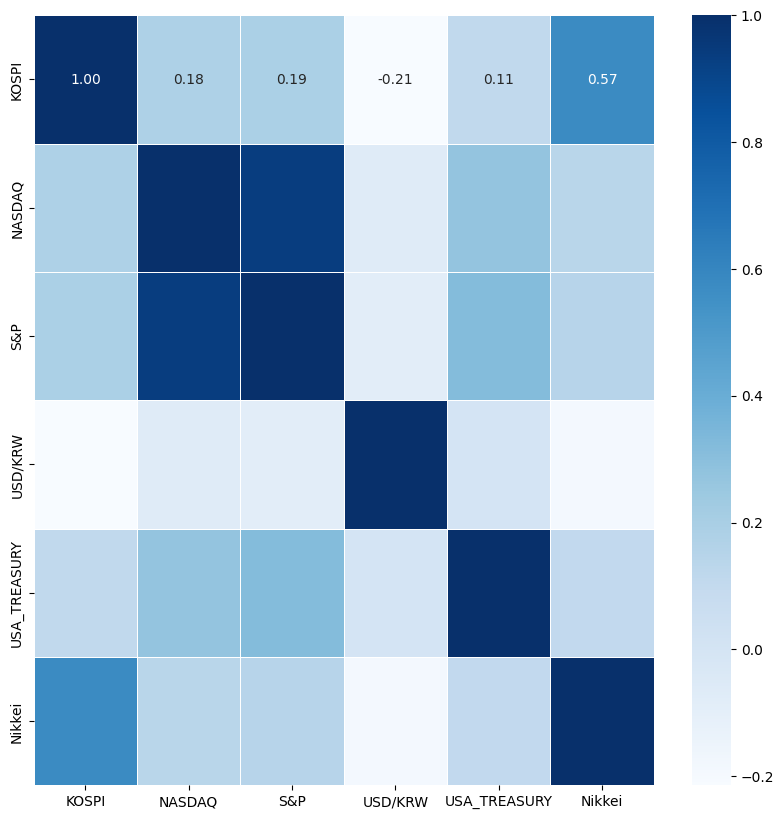

In [24]:
plt.figure(figsize=(10, 10))
sns.heatmap(result_data.corr(), annot=True, fmt=".2f", linewidths=0.5, cmap="Blues")

### 상관관계 계수 확인하기
- 확실히 Nasdaq과 S&P가 서로 미국시장이라서 상관관계가 높은것을 확인할 수 있고, kospi와의 상관관계는 1.Nikkei > 2. Nasdaq > 3. S&P > 4.usa_treasury > 5.Dollar 순의 상관관계를 보임

In [25]:
idx, vals = [], []
for ix, i in enumerate(result_data.columns.values):
    for j in result_data.columns.values[ix + 1 :]:
        idx.append((i, j))
        vals.append(result_data.corr()[i][j])

ser = pd.Series(data=vals, index=idx)
ser_ord = ser.sort_values(ascending=False)
ser_ord

(NASDAQ, S&P)              0.935120
(KOSPI, Nikkei)            0.573996
(S&P, USA_TREASURY)        0.320243
(NASDAQ, USA_TREASURY)     0.272478
(KOSPI, S&P)               0.191504
(KOSPI, NASDAQ)            0.183251
(S&P, Nikkei)              0.150417
(NASDAQ, Nikkei)           0.139791
(KOSPI, USA_TREASURY)      0.112634
(USA_TREASURY, Nikkei)     0.105029
(USD/KRW, USA_TREASURY)    0.003017
(NASDAQ, USD/KRW)         -0.062888
(S&P, USD/KRW)            -0.083665
(USD/KRW, Nikkei)         -0.186027
(KOSPI, USD/KRW)          -0.214379
dtype: float64

### 산점도 그래프

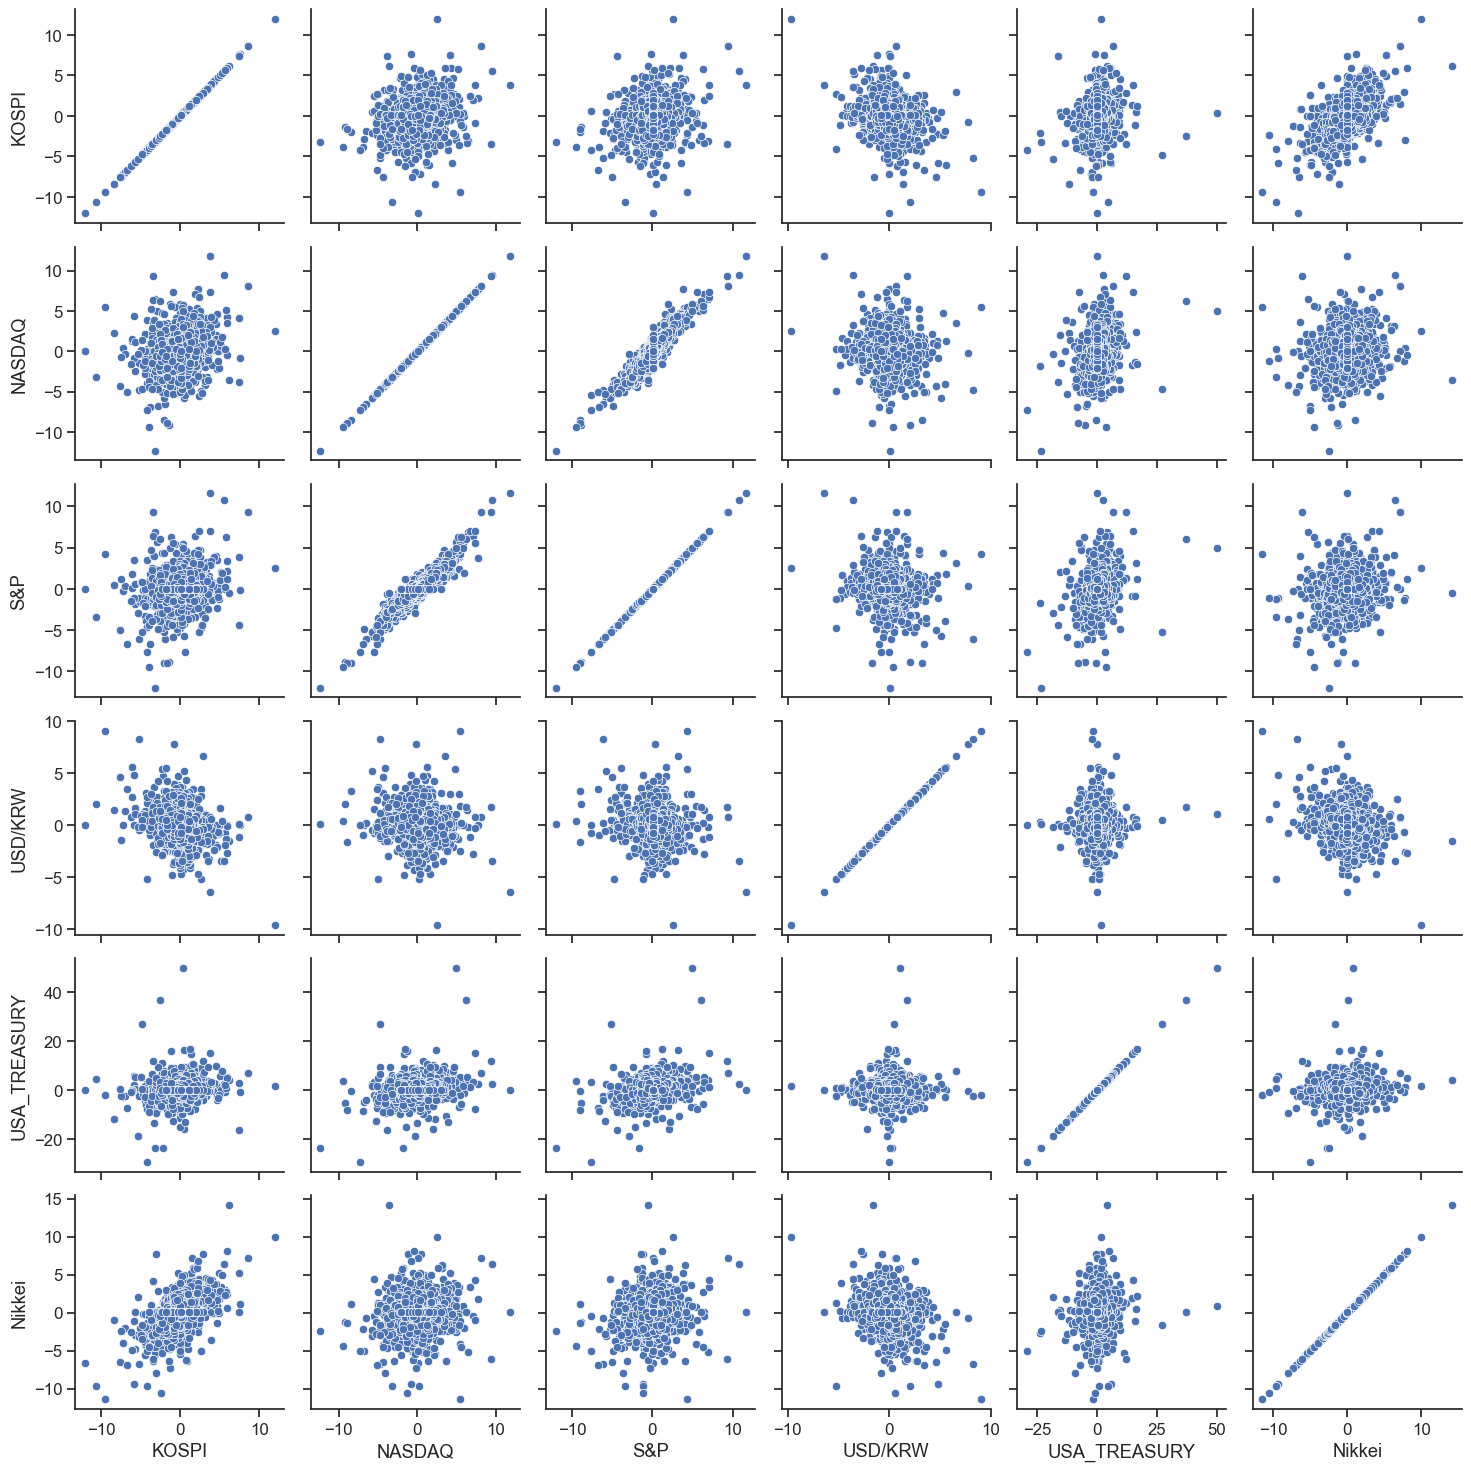

In [26]:
sns.set(font_scale=1.1)  ## 폰트사이즈 조절
sns.set_style("ticks")  ## 축 눈금 표시
data = result_data[["KOSPI", "NASDAQ", "S&P", "USD/KRW", "USA_TREASURY", "Nikkei"]]
sns.pairplot(data, diag_kind=None)
plt.show()

## 세계 각국 지수의 수익률 대비 risk 시각화

### 평균수익률 및 표준편차

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51061 (\N{HANGUL SYLLABLE IG}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from current font.
  func(*args, **kwarg

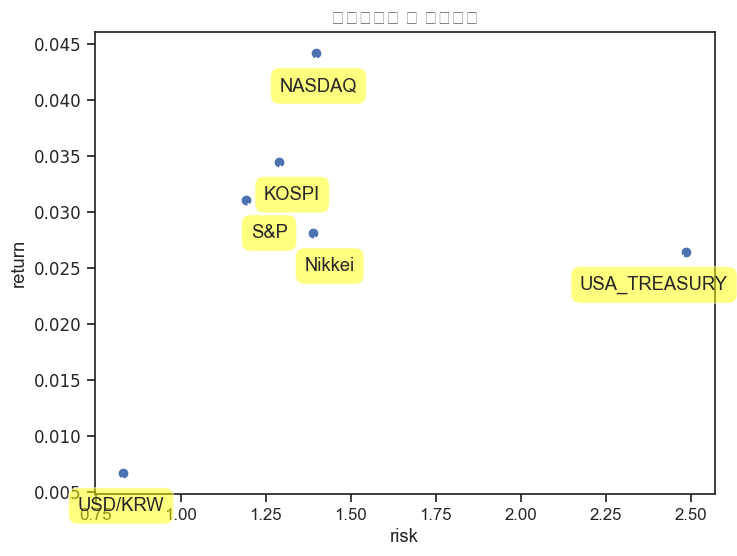

In [27]:
plt.figure(figsize=(8, 6))
plt.yticks(
    fontname="DejaVu Sans"
)  # 한글 폰트가 지수에 음수를 표시하지 못하므로 ytick의 폰트를 바꾸어 줍니다.
plt.scatter(result_data.std(), result_data.mean())
plt.xlabel("risk")
plt.ylabel("return")
plt.title("평균수익률 및 표준편차")
for label, x, y in zip(result_data.columns, result_data.std(), result_data.mean()):
    plt.annotate(
        label,
        xy=(x, y),
        xytext=(30, -30),
        textcoords="offset points",
        ha="right",
        va="bottom",
        bbox=dict(boxstyle="round,pad=0.5", fc="yellow", alpha=0.5),
        arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0"),
    )

### 누적수익률 및 표준편차 

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 45572 (\N{HANGUL SYLLABLE NU}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45572 (\N{HANGUL SYLLABLE NU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


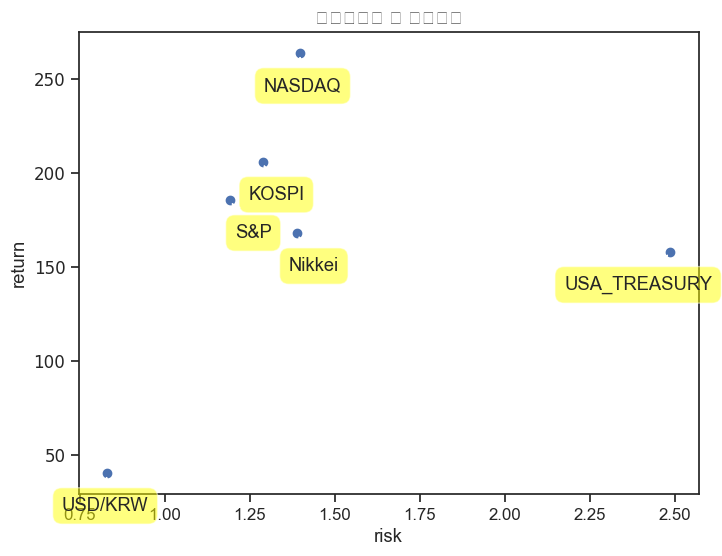

In [28]:
plt.figure(figsize=(8, 6))
plt.yticks(
    fontname="DejaVu Sans"
)  # 한글 폰트가 지수에 음수를 표시하지 못하므로 ytick의 폰트를 바꾸어 줍니다.
plt.scatter(result_data.std(), result_data.sum())
plt.xlabel("risk")
plt.ylabel("return")
plt.title("누적수익률 및 표준편차")
for label, x, y in zip(result_data.columns, result_data.std(), result_data.sum()):
    plt.annotate(
        label,
        xy=(x, y),
        xytext=(30, -30),
        textcoords="offset points",
        ha="right",
        va="bottom",
        bbox=dict(boxstyle="round,pad=0.5", fc="yellow", alpha=0.5),
        arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0"),
    )